In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import function_library_assignment_2 as fnc
import random

%load_ext autoreload
%autoreload 2

plt.rcParams['font.size']=12
plt.rcParams['font.family']='serif'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False  
plt.rcParams['axes.spines.bottom'] = True     
plt.rcParams["axes.grid"] =True
plt.rcParams['grid.linestyle'] = '-.' 
plt.rcParams['grid.linewidth'] = 0.4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
random.seed(2) #seed to ensure that we can get the same random values again
wind_scenarios = random.sample(range(100), 50) #How many scenarios? Sampling without replacement - taking 100 samples will just get a list from 0 to 99
wind_scenarios.sort()

wind_data = []
for i in range(6):
    wt = pd.read_csv('data/' + 'wind %d.out' % (i + 1))
    wt = wt.drop(columns = ['Unnamed: 0']) #dropping the unnecessary index column
    wt['Expected'] = wt.mean(numeric_only=True, axis=1)
    wt = wt[list(wt.columns[wind_scenarios]) + ['Expected']] * 300

    #wt = wt.loc[wt.index == wind_hour]

    wind_data.append(wt)

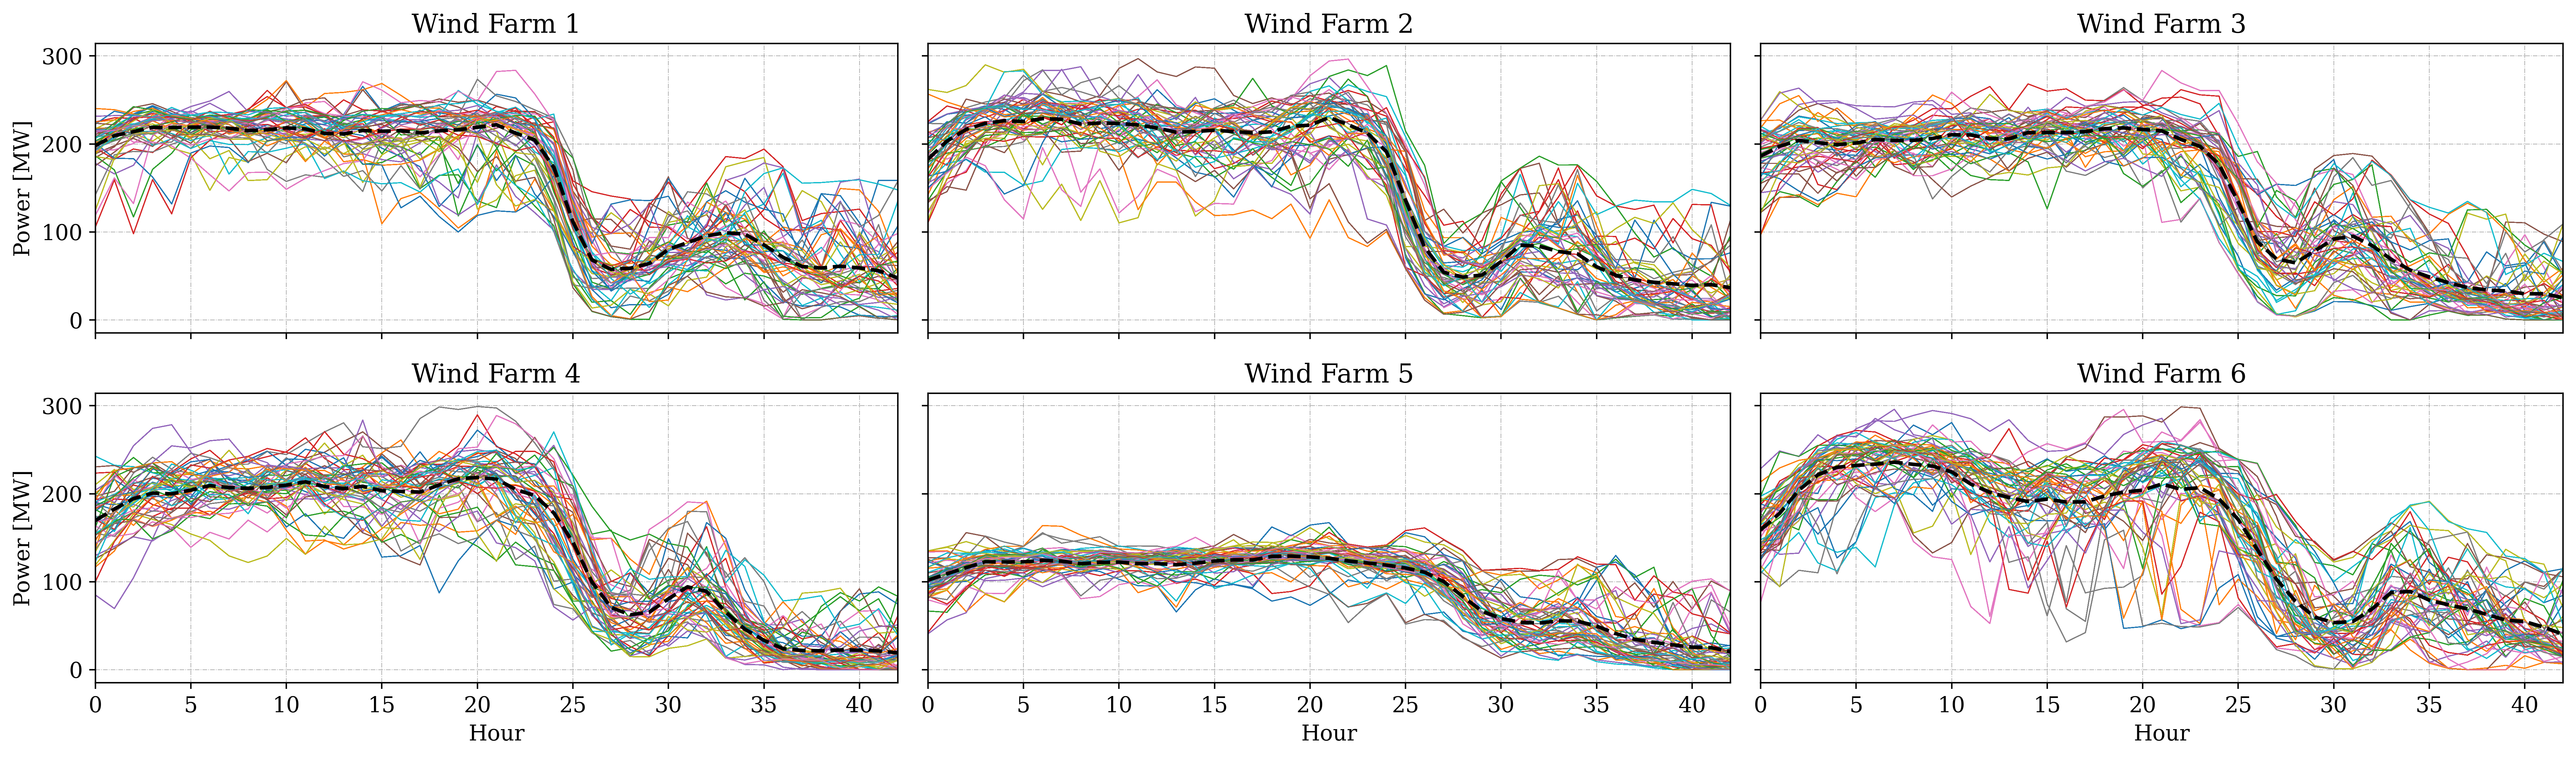

In [48]:
fig,ax = plt.subplots(2,3, sharey=True, sharex=True, figsize=( 20 , 6 ), dpi=400) # Create the figure

i = 0

for n in range(2):
    for k in range(3):
        for c in range(len(wind_scenarios)):
            ax[n][k].plot(wind_data[i][wind_data[i].columns[:-1].to_numpy()], linewidth=0.5, alpha=0.8)
            ax[n][k].spines[['right', 'top']].set_visible(True)
        ax[n][k].plot(wind_data[i]['Expected'], color='black', linewidth=2, linestyle='--')
        ax[n][k].set_title('Wind Farm %d' % (i + 1))

        i += 1

        ax[n][k].margins(x=0)
        ax[1][k].set_xlabel('Hour')

    ax[n][0].set_ylabel('Power [MW]')

fig.tight_layout() # reduces white space around figures
plt.savefig('Figures/wind data.png')
plt.show()